In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
file_path = 'twitter_training.csv'
data = pd.read_csv(file_path)

In [4]:
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [5]:
data.columns

Index(['ID', 'Topic', 'Sentiment', 'Text'], dtype='object')

In [6]:
data = data.drop(columns=['ID'])

In [7]:
data['Sentiment'] = data['Sentiment'].str.strip()
sentiment_counts = data['Sentiment'].value_counts()

In [8]:
data['Text'] = data['Text'].astype(str)
data = data.dropna(subset=['Text'])

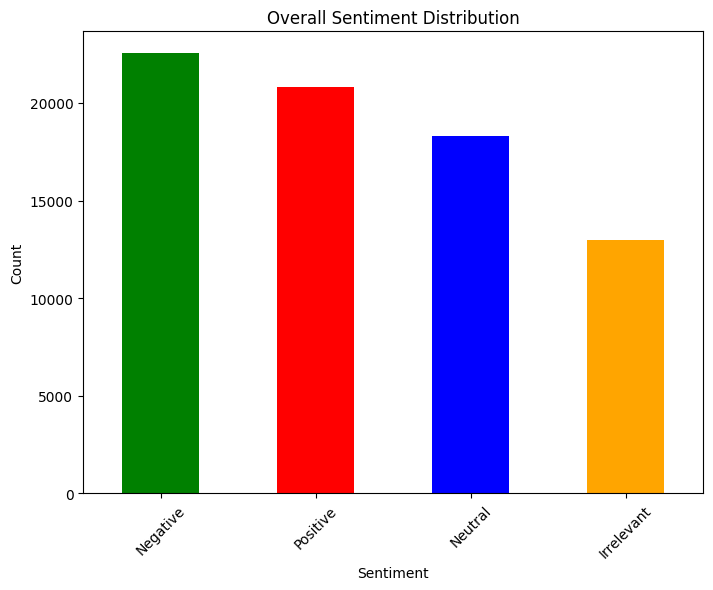

In [9]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue', 'orange'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
def generate_wordcloud(data, sentiment):
    text = " ".join(review for review in data[data['Sentiment'] == sentiment].Text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

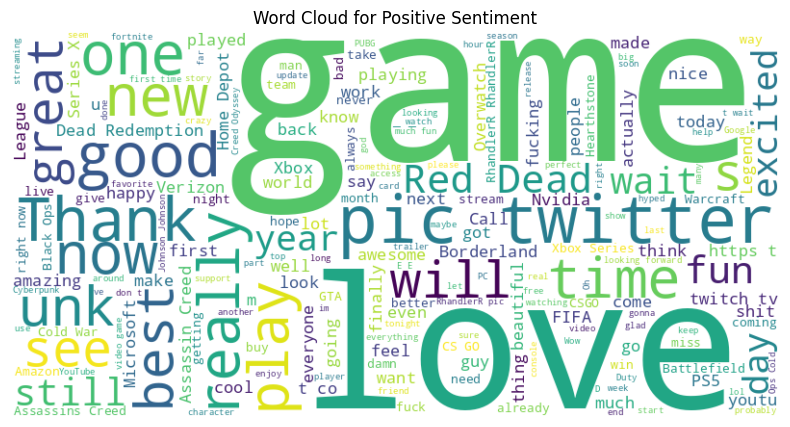

In [11]:
generate_wordcloud(data, 'Positive')

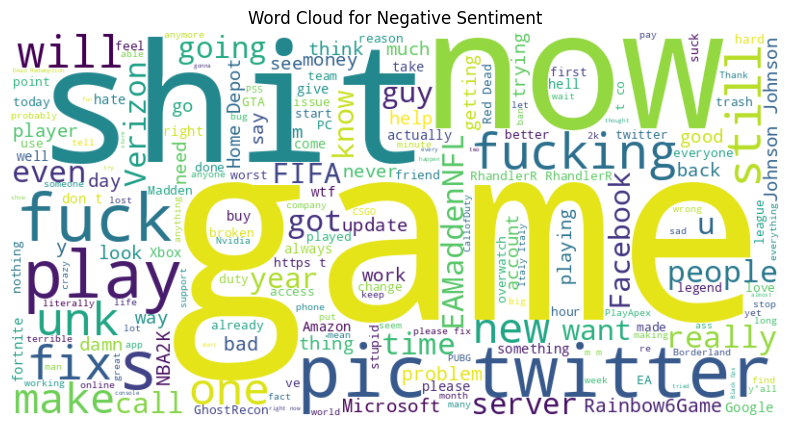

In [12]:
generate_wordcloud(data, 'Negative')

In [13]:
unique_brands = data['Topic'].unique()

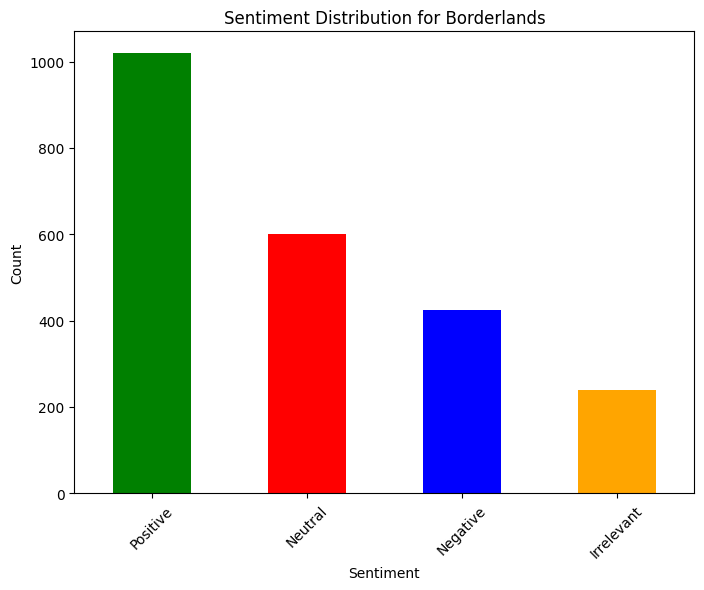

Word Cloud for Borderlands - Positive Sentiment


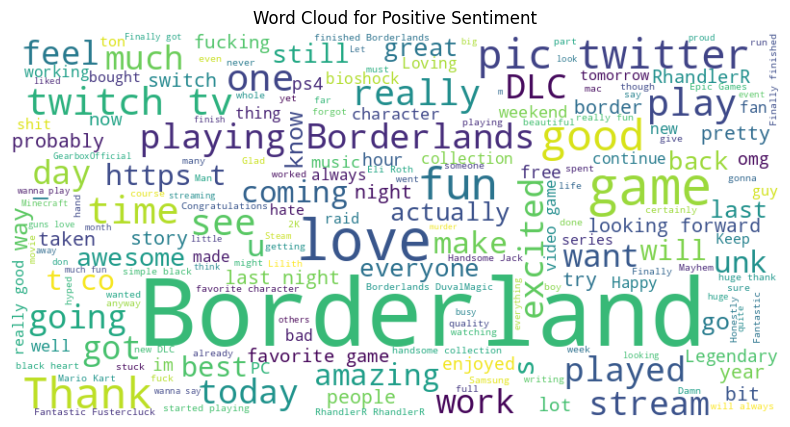

Word Cloud for Borderlands - Negative Sentiment


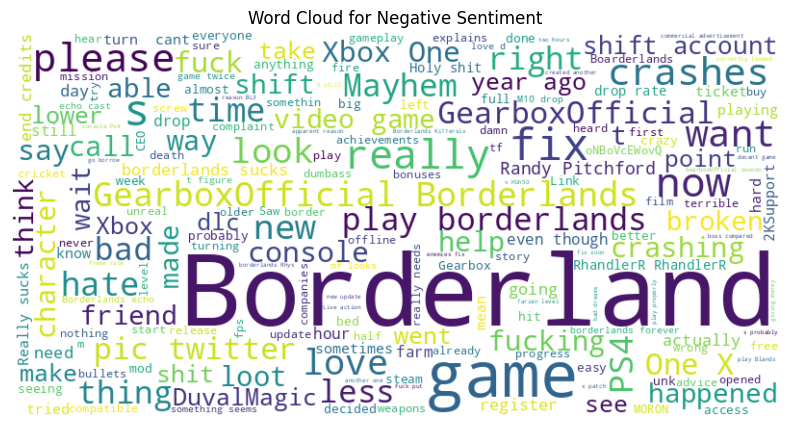

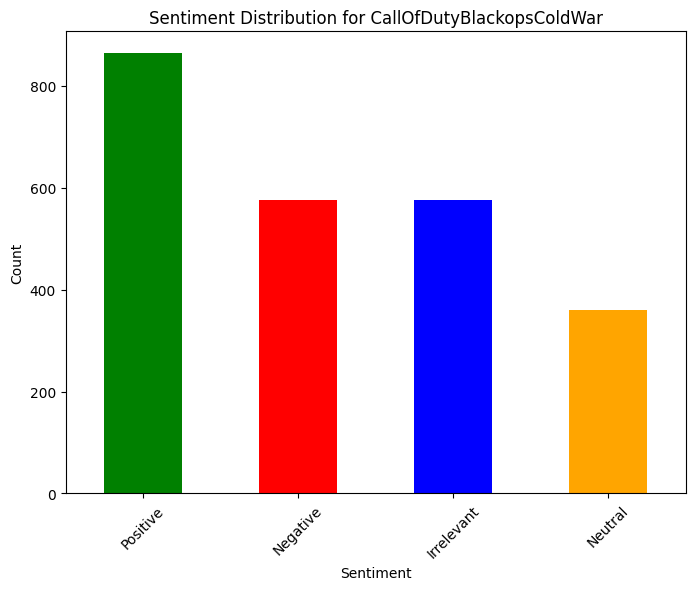

Word Cloud for CallOfDutyBlackopsColdWar - Positive Sentiment


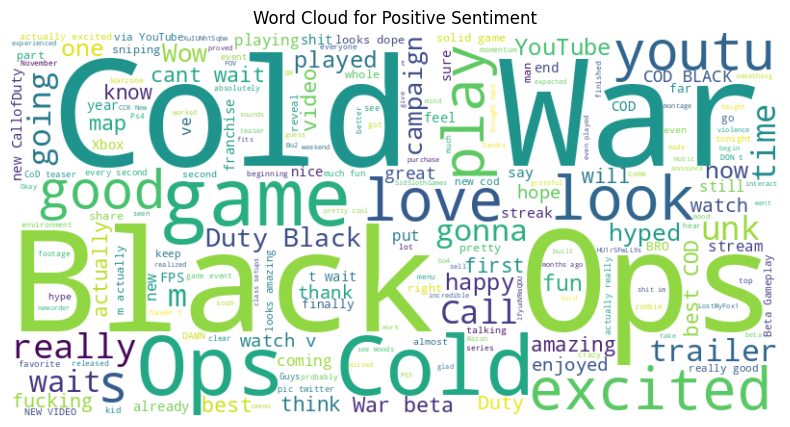

Word Cloud for CallOfDutyBlackopsColdWar - Negative Sentiment


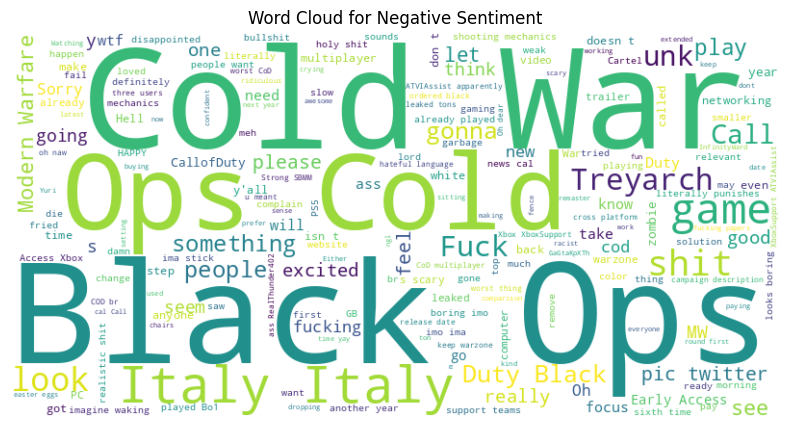

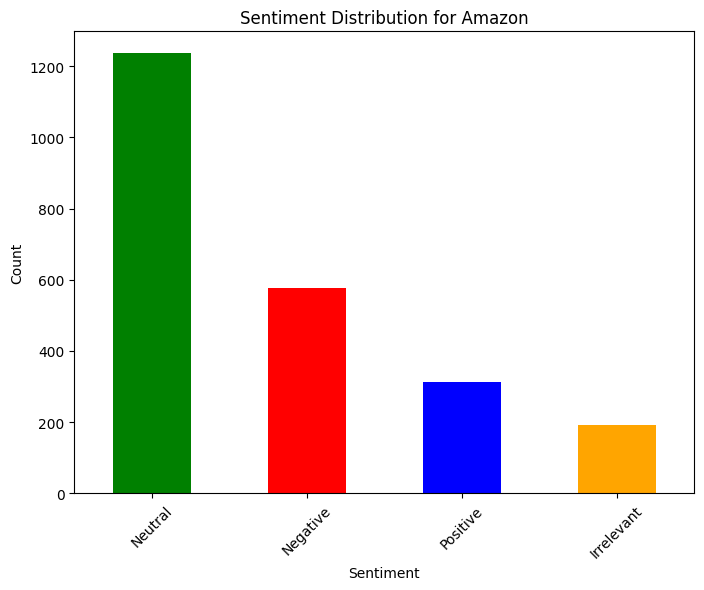

Word Cloud for Amazon - Positive Sentiment


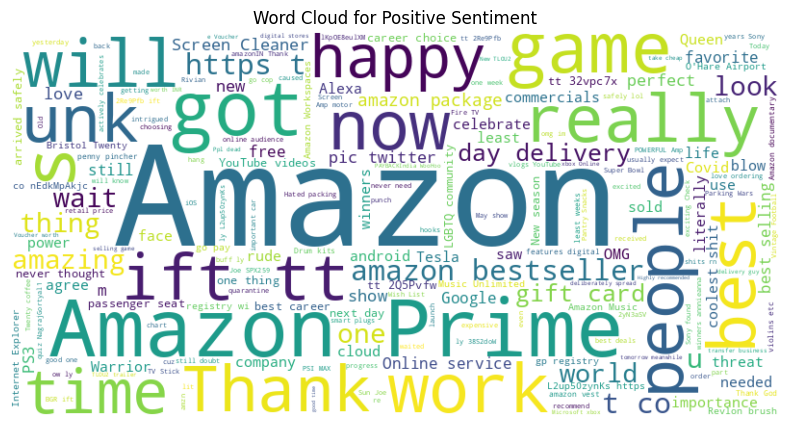

Word Cloud for Amazon - Negative Sentiment


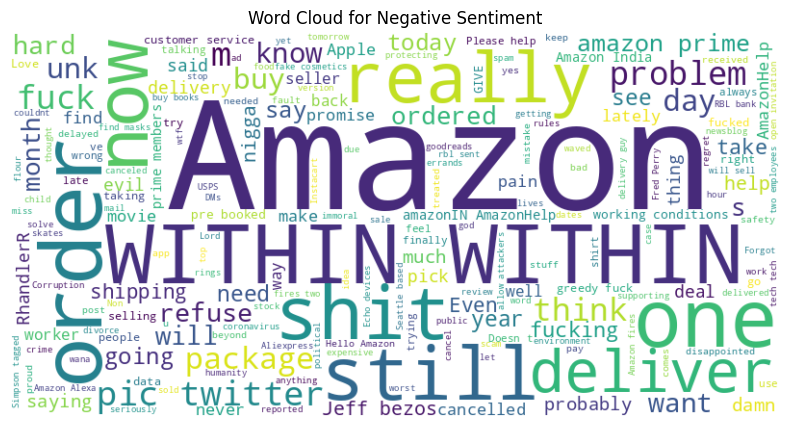

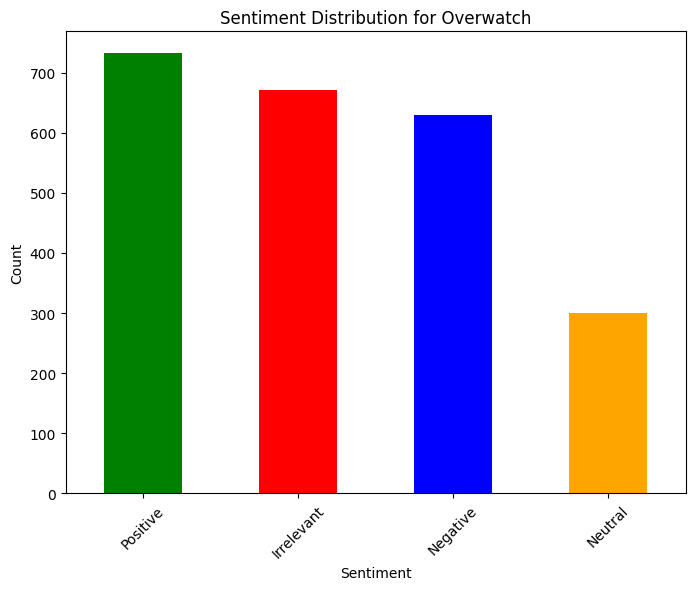

Word Cloud for Overwatch - Positive Sentiment


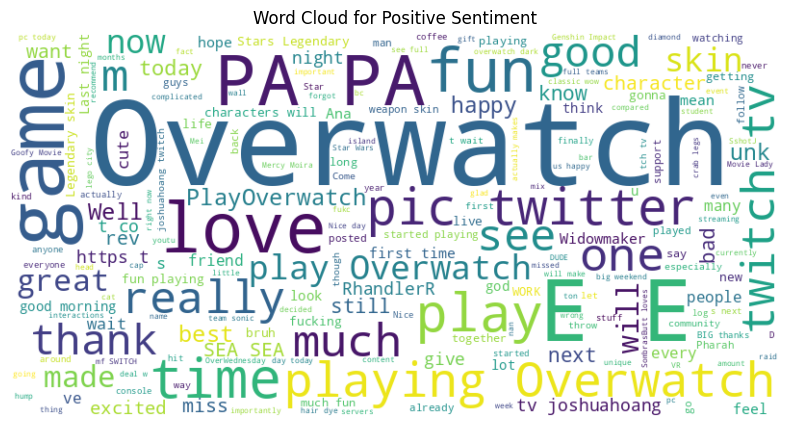

Word Cloud for Overwatch - Negative Sentiment


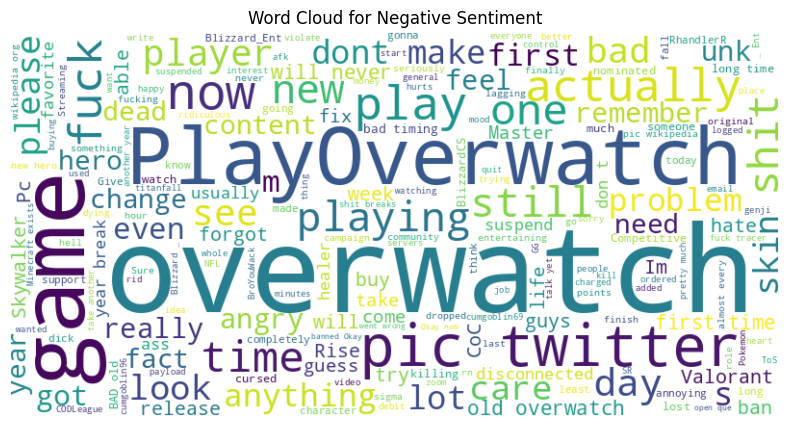

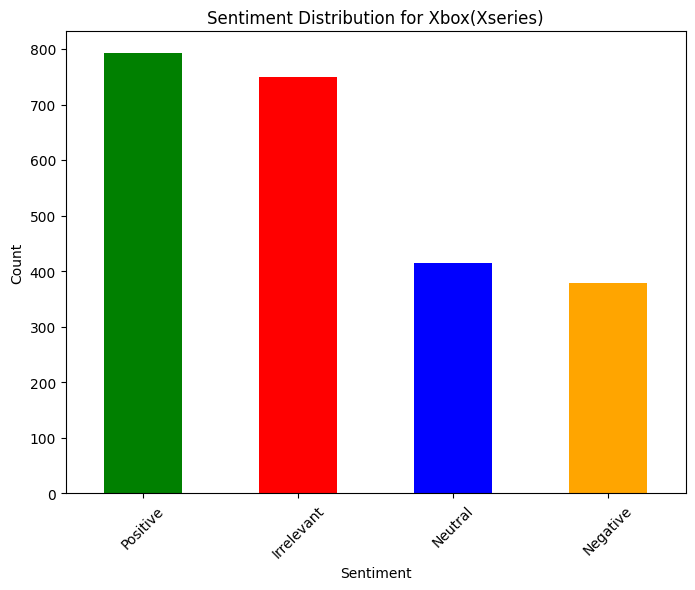

Word Cloud for Xbox(Xseries) - Positive Sentiment


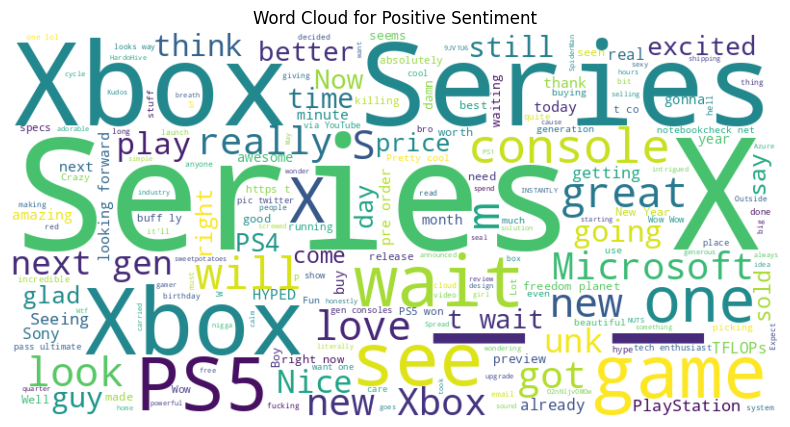

Word Cloud for Xbox(Xseries) - Negative Sentiment


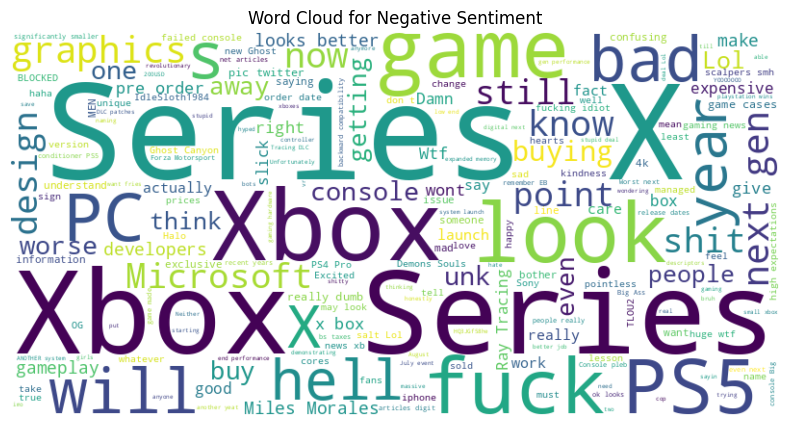

In [14]:
for brand in unique_brands[:5]:
    brand_data = data[data['Topic'] == brand]
    sentiment_counts = brand_data['Sentiment'].value_counts()

    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue', 'orange'])
    plt.title(f'Sentiment Distribution for {brand}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    print(f'Word Cloud for {brand} - Positive Sentiment')
    generate_wordcloud(brand_data, 'Positive')

    print(f'Word Cloud for {brand} - Negative Sentiment')
    generate_wordcloud(brand_data, 'Negative')